first get the dataset sent


In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [3]:
df = pd.read_csv('/content/twitter_sentiment.csv', header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'text']

In [4]:
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)

df = df[df['text'].apply(len)>1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [6]:
df['sentiment'].value_counts()

sentiment
Negative      22530
Positive      20844
Neutral       18285
Irrelevant    12988
Name: count, dtype: int64

In [7]:
dt = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None, index_col=[0])


In [8]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-1knrlb2g
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-1knrlb2g
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=e4bd63cafdbacdc6272398c02fb1fbef5594cb8e4a838d48f6c1fe1bafe7573f
  Stored in directory: /tmp/pip-ephem-wheel-cache-oa4csjsw/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [9]:
import preprocess_kgptalkie as ps

df = ps.get_basic_features(df)

In [10]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [11]:
df.head

<bound method NDFrame.head of         sentiment                                               text  \
0        Positive  im getting on borderlands and i will murder yo...   
1        Positive  I am coming to the borders and I will kill you...   
2        Positive  im getting on borderlands and i will kill you ...   
3        Positive  im coming on borderlands and i will murder you...   
4        Positive  im getting on borderlands 2 and i will murder ...   
...           ...                                                ...   
75677  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...   
75678  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...   
75679    Positive  Today sucked so it’s time to drink wine n play...   
75680    Positive  Bought a fraction of Microsoft today. Small wins.   
75681     Neutral  Johnson & Johnson to stop selling talc baby po...   

       char_counts  word_counts  avg_wordlength  stopwords_counts  \
0               43           11        3.909091                 6   
1               40           12        3.333333                 6   
2               41           10        4.100000                 5   
3               42           10        4.200000                 5   
4               46           12        3.833333                 6   
...            ...          ...             ...               ...   
75677          235           47        5.000000                20   
75678          202           46        4.391304                15   
75679           97           24        4.041667                 9   
75680           42            8        5.250000                 2   
75681          101           16        6.312500                 3   

       hashtag_counts  mentions_counts  digits_counts  uppercase_counts  
0                   0                0              1                 0  
1                   0                0              1                 2  
2                   0                0              1                 0  
3                   0                0              1                 0  
4                   0                0              2                 0  
...               ...              ...            ...               ...  
75677               0                0              6                 1  
75678               0                0              4                10  
75679               0                0              1                 1  
75680               0                0              2                 0  
75681               0                0              8                 1  

[74647 rows x 10 columns]>

In [12]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


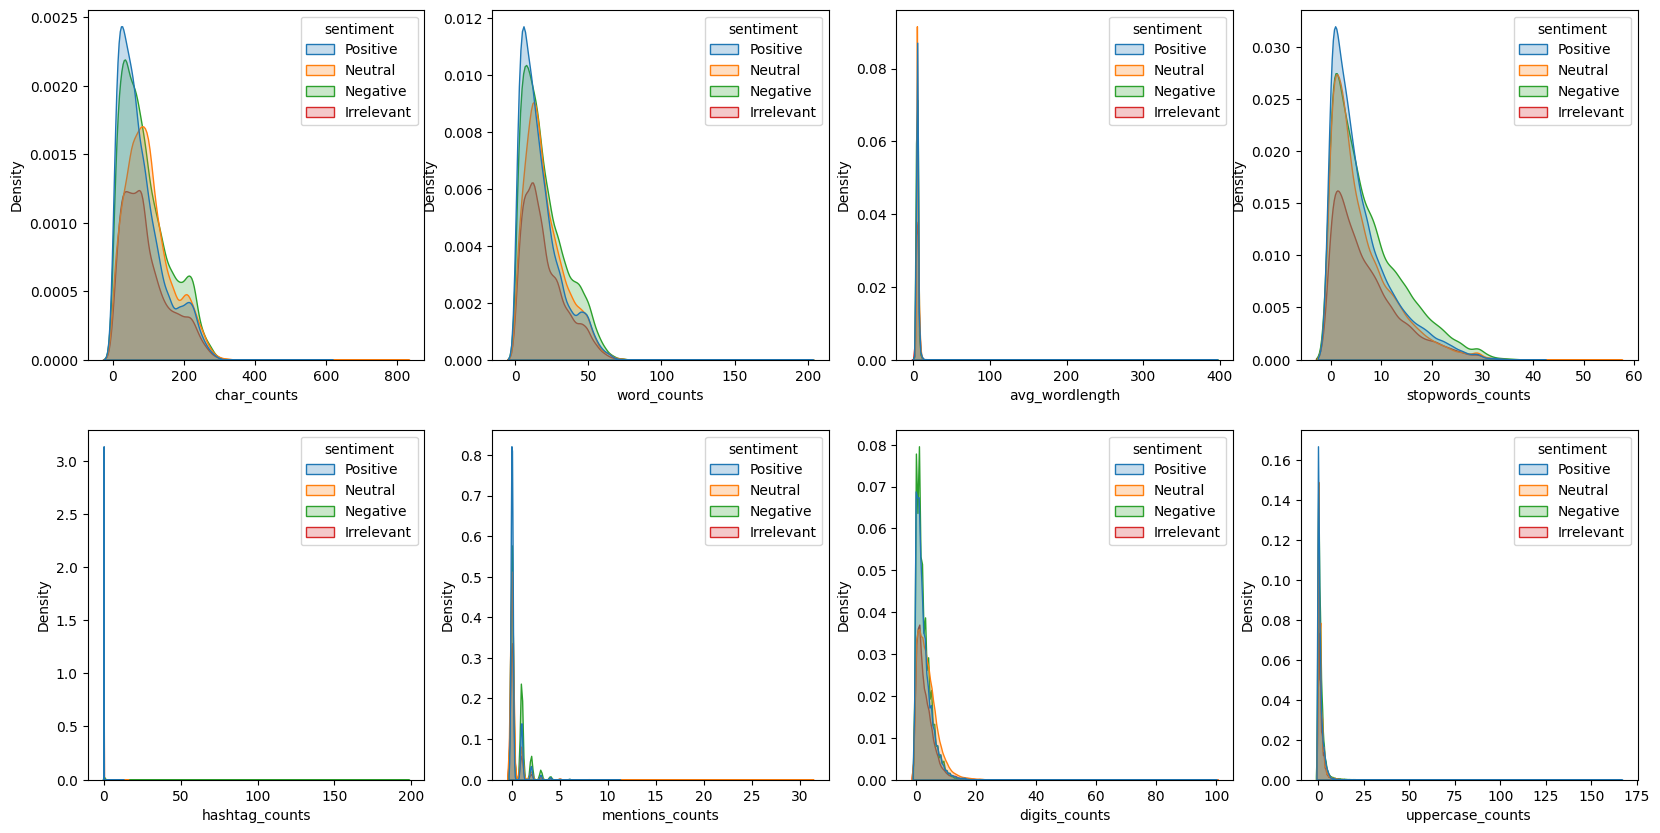

In [13]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.subplot(2,4, num_cols.get_loc(col)+1)

    # use sentiment as hue to see the distribution of each numerical feature
    # sns.distplot(df[col], label=col, color='red')
    # sns.histplot(x=col, hue='sentiment', data=df, color='green', bins=100, kde=True)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=True)

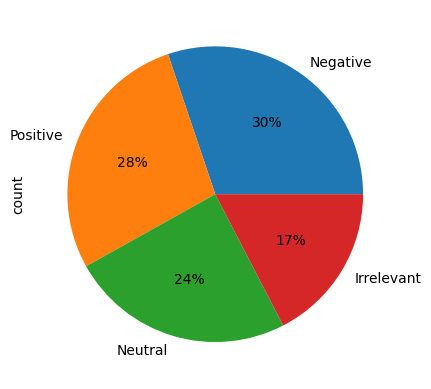

In [14]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# word cloud
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

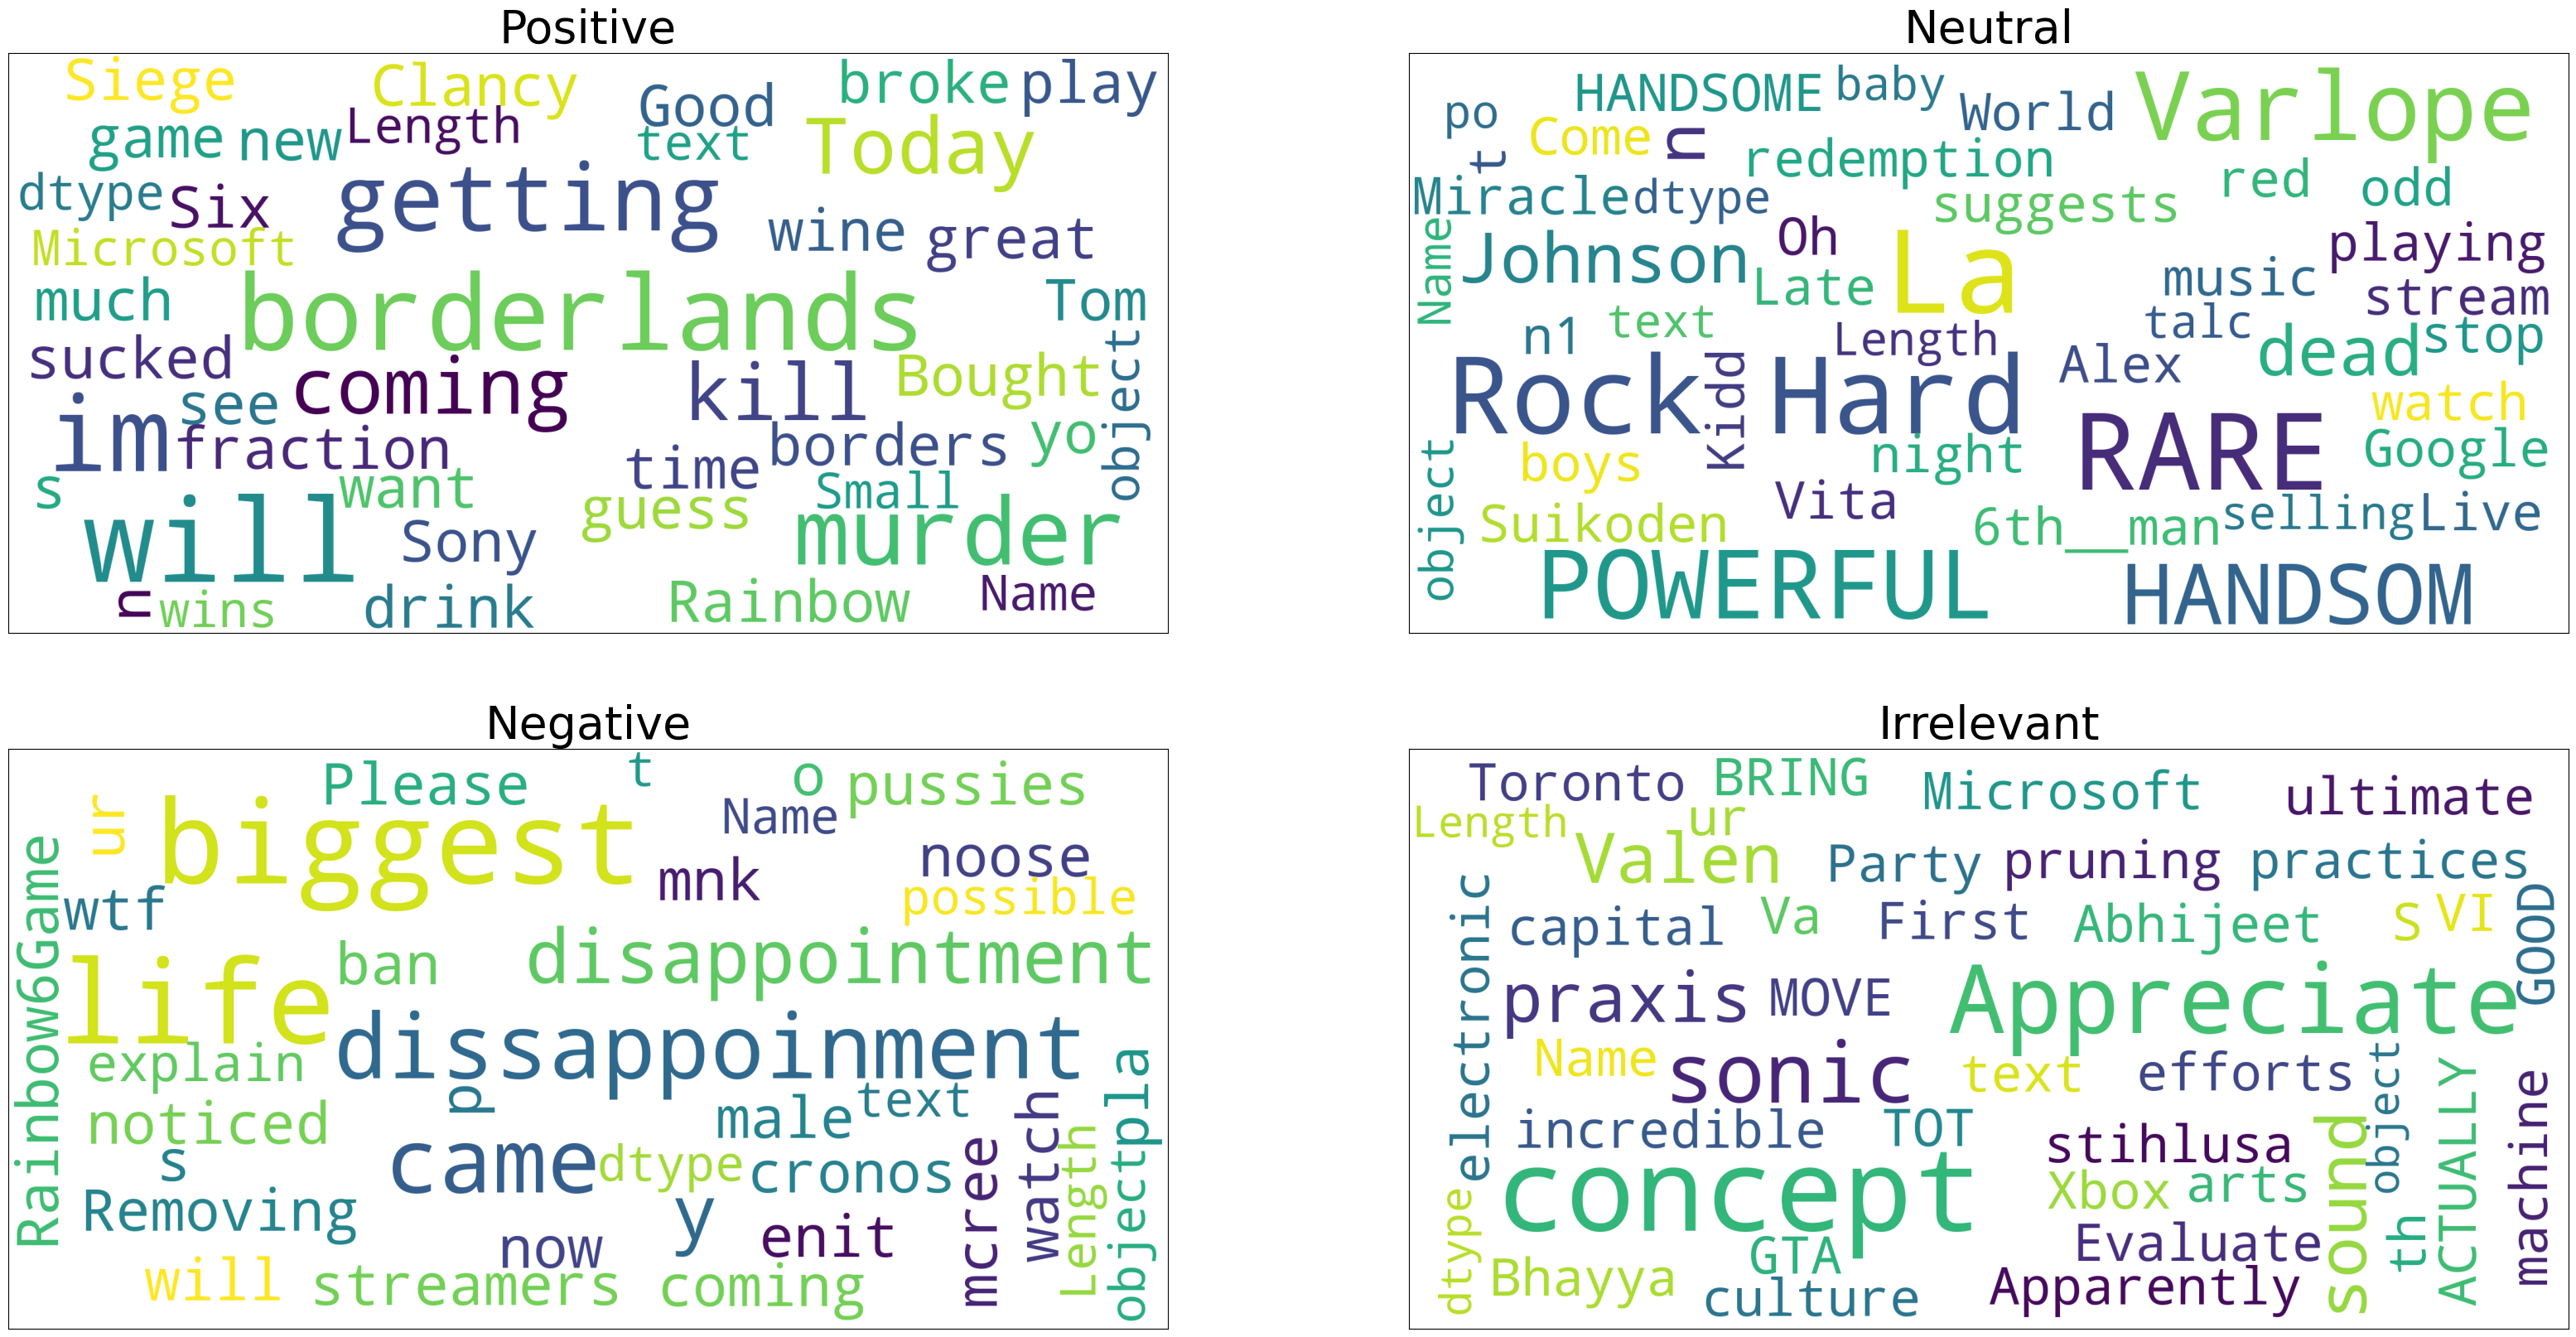

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    # print(col)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

In [16]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))

In [17]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,i am coming to the borders and i will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you all,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


In [18]:
import spacy

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Define preprocessing function
def preprocess(text):
    # remove stop words and Lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

# Apply preprocessing to 'Text' column in DataFrame
df['preprocessed_txt'] = df['text'].apply(preprocess)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_txt'], df['sentiment'], test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape

((59717,), (14930,))

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# stop_words=list(stopwords)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

# evaluation
from sklearn.metrics import accuracy_score

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))


0.9068318821165439


In [23]:
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [24]:
# Preprocess the text
preprocessed_text = preprocess('what a wonderful guy')

# Make prediction
prediction = clf.predict([preprocessed_text])

print(prediction)


['Positive']


In [ ]:

prediction = clf.predict(['what a wonderfull guy'])
print(prediction)

In [25]:
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [29]:
%%writefile app.py
import streamlit as st
import pickle
import time

import spacy

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Define preprocessing function
def preprocess(text):
    # remove stop words and Lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

st.title('Twitter Sentiment Analysis')

# Load your trained classifier model from a pickle file safely using a context manager
with open('twitter_sentiment.pkl', 'rb') as file:
    model = pickle.load(file)

tweet = st.text_input('Enter your tweet')

submit = st.button('Predict')

if submit:
    start = time.time()
    preprocessed_text = preprocess(tweet)
    prediction = model.predict([preprocessed_text])
    end = time.time()
    st.write('Prediction time taken: ', round(end-start, 2), 'seconds')
    st.write('Predicted sentiment: ', prediction[0])



Writing app.py


In [27]:
!wget -q -O - ipv4.icanhazip.com

34.134.216.164


In [ ]:
!pip install streamlit

In [30]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.134.216.164:8501

npx: installed 22 in 2.342s
your url is: https://violet-games-push.loca.lt
  Stopping...
^C
